In [2]:
#Reading file
import pandas as pd
import matplotlib.pyplot as plt
g = open("amazon-orders-Kali.csv", "r")
df = pd.read_csv("amazon-orders-Kali.csv")
df.head()
df.shape

(65, 36)

In [3]:
#Data cleaning
df = df.fillna(0)
df["Item Total"] = df["Item Total"].str.replace("$", "").astype(float)
df["Item Subtotal Tax"] = df["Item Subtotal Tax"].str.replace("$", "").astype(float)
df["Order Date"] = pd.to_datetime(df["Order Date"])
df.head()

/var/folders/2z/_lnp0r6j35jdrtfq_fdr_wkw0000gn/T/ipykernel_77981/52630518.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Item Total"] = df["Item Total"].str.replace("$", "").astype(float)
/var/folders/2z/_lnp0r6j35jdrtfq_fdr_wkw0000gn/T/ipykernel_77981/52630518.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Item Subtotal Tax"] = df["Item Subtotal Tax"].str.replace("$", "").astype(float)


,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,...,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,2019-08-12,114-1601351-0527409,"Energy, Environment, and Climate",ABIS_BOOK,0393622916,55101500.0,Amazon.com,2017-08-15T00:00:01,used good,eCampus_,...,SUREPOST(1Z9702X53A89128833),$33.15,1.99,35.14,False,0.0,False,Kali,USD,0.0
1,2019-08-12,114-1601351-0527409,"Energy, Environment, and Climate",ABIS_BOOK,0393622916,55101500.0,Amazon.com,2017-08-15T00:00:01,used good,eCampus_,...,SUREPOST(1Z9702X53A89128833),$33.15,1.99,35.14,False,0.0,False,Kali,USD,0.0
2,2019-10-31,114-5583333-9789832,Capezio Women's Classic Short Sleeve Leotard,LEOTARD,B002KIA000,53100000.0,Amazon.com,0,new,Smilar Love,...,USPS(9200190213424904823533),$16.60,1.00,17.60,0,0.0,0,Kali,USD,0.0
3,2019-10-31,114-7905947-1248212,CLEECLI Women's Ballroom Dance Shoes Latin Sal...,SHOES,B07G4Y1GCR,53110000.0,Amazon.com,0,new,CLEECLI,...,UPS(1Z874RY40301209674),$39.99,2.40,42.39,0,0.0,0,Kali,USD,0.0
4,2019-10-31,114-7905947-1248212,Womens High Waist A-line Full Flared Swing Off...,SKIRT,B07X87DNK4,53100000.0,Amazon.com,0,new,Jack Smith Fashion,...,UPS(1Z874RY40301209674),$18.99,1.14,20.13,0,0.0,0,Kali,USD,0.0


In [38]:
import numpy as np
import pandas as pd
total_charged = df["Item Total"].sum()
average_purchase = round(df["Item Total"].mean(), 2)
median_purchase = df["Item Total"].median()
Q1 = np.quantile(df["Item Total"], 0.25)
Q3 = np.quantile(df["Item Total"], 0.75)
most_expensive = df["Item Total"].max()
least_expensive = df["Item Total"].min()
total_tax = df["Item Subtotal Tax"].sum()
sd = round(df["Item Total"].std(), 2)

print("Total Charged    Average     SD      Min      Q1    Median    Q3   Max")
print("    {}       {}      {}    {}    {}   {}   {}   {}".format(total_charged, average_purchase, sd, least_expensive, Q1, median_purchase, Q3, most_expensive))



Total Charged    Average     SD      Min      Q1    Median    Q3   Max
    2060.28       31.7      33.82    0.0    15.85   20.88   31.8   167.43


<AxesSubplot:title={'center':'Individual Orders by Date and Price'}, xlabel='Order Date', ylabel='Item Total'>

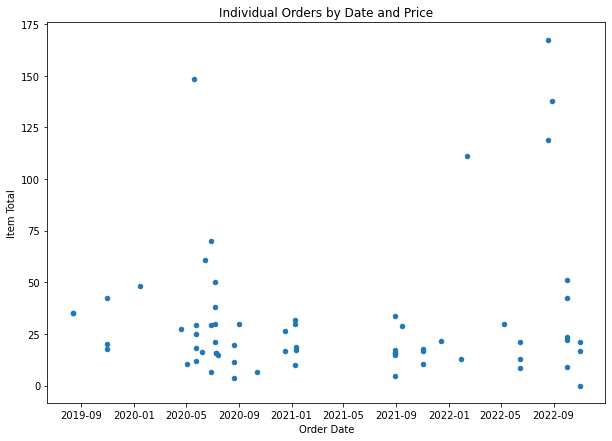

In [5]:
df.plot.scatter(x = "Order Date", y = "Item Total", figsize = (10,7), 
                title = "Individual Orders by Date and Price")

<AxesSubplot:title={'center':'Daily Orders'}, xlabel='Order Date'>

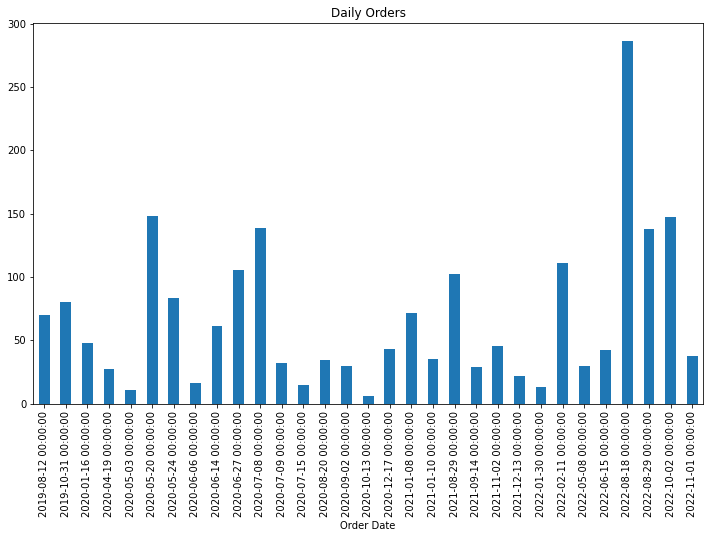

In [6]:
import matplotlib.pyplot as plt
daily_orders = df.groupby("Order Date").sum()["Item Total"]
daily_orders.plot.bar(figsize = (12,7), title = "Daily Orders")



<AxesSubplot:title={'center':'Order totals by month'}, ylabel='Item Total'>

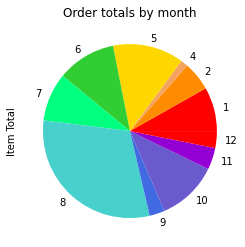

In [7]:
monthly_orders = df.groupby(df["Order Date"].dt.month).sum()["Item Total"]
monthly_orders.head()
monthly_orders.plot.pie(colors = ["red", "darkorange", "sandybrown", 'gold', 
                                  'limegreen', "springgreen", 'mediumturquoise',
                                  "royalblue", "slateblue", "darkviolet"],
                       title = "Order totals by month")

In [8]:
from datetime import datetime, timedelta 
import pandas as pd

christmas_list = []

for date in df["Order Date"]:
    christmas = pd.to_datetime("12-25-{}".format(date.year))
    christmas_list.append(christmas)

days_until_christmas = []

for index in range(0, len(df["Order Date"])):
    days_until = df["Order Date"][index]-christmas_list[index]
    days_until_christmas.append(float(days_until/ timedelta(days = 1)))
print(days_until_christmas)

[-135.0, -135.0, -55.0, -55.0, -55.0, -344.0, -250.0, -236.0, -219.0, -215.0, -215.0, -215.0, -215.0, -202.0, -194.0, -181.0, -181.0, -181.0, -170.0, -170.0, -170.0, -170.0, -169.0, -169.0, -163.0, -127.0, -127.0, -127.0, -114.0, -73.0, -8.0, -8.0, -351.0, -351.0, -351.0, -349.0, -349.0, -118.0, -118.0, -118.0, -118.0, -118.0, -118.0, -102.0, -53.0, -53.0, -53.0, -12.0, -329.0, -317.0, -231.0, -193.0, -193.0, -193.0, -129.0, -129.0, -118.0, -84.0, -84.0, -84.0, -84.0, -84.0, -54.0, -54.0, -54.0]


In [11]:
school_start = []

for date in df["Order Date"]:
    school = pd.to_datetime("9-1-{}".format(date.year))
    school_start.append(school)

days_until_school = [] 
for index in range(0, len(df["Order Date"])):
    days_until = df["Order Date"][index]-school_start[index]
    days_until_school.append(float(days_until/ timedelta(days = 1)))

In [13]:
bc_numpurchases = {}

for day in days_until_christmas:
    if day not in bc_numpurchases.keys():
        bc_numpurchases[day] = 1
    elif day in bc_numpurchases.keys():
        bc_numpurchases[day] += 1
print(bc_numpurchases)

{-135.0: 2, -55.0: 3, -344.0: 1, -250.0: 1, -236.0: 1, -219.0: 1, -215.0: 4, -202.0: 1, -194.0: 1, -181.0: 3, -170.0: 4, -169.0: 2, -163.0: 1, -127.0: 3, -114.0: 1, -73.0: 1, -8.0: 2, -351.0: 3, -349.0: 2, -118.0: 7, -102.0: 1, -53.0: 3, -12.0: 1, -329.0: 1, -317.0: 1, -231.0: 1, -193.0: 3, -129.0: 2, -84.0: 5, -54.0: 3}


In [20]:
bc_valpurchases = {}
for index in range(0, len(df["Item Total"])):
    if days_until_christmas[index] not in bc_valpurchases.keys():
        bc_valpurchases[days_until_christmas[index]] = df["Item Total"][index]
    elif days_until_christmas[index] in bc_valpurchases.keys():
        bc_valpurchases[days_until_christmas[index]] += df["Item Total"][index]
        
print(bc_valpurchases)

{-135.0: 70.28, -55.0: 80.12, -344.0: 48.21, -250.0: 27.55, -236.0: 10.56, -219.0: 148.3, -215.0: 83.58, -202.0: 16.44, -194.0: 60.95, -181.0: 105.36, -170.0: 138.63, -169.0: 31.78, -163.0: 14.83, -127.0: 34.3, -114.0: 29.67, -73.0: 6.3, -8.0: 42.95, -351.0: 71.7, -349.0: 35.65, -118.0: 240.04, -102.0: 28.61, -53.0: 45.2, -12.0: 21.61, -329.0: 12.92, -317.0: 111.28, -231.0: 29.72, -193.0: 42.24, -129.0: 286.15, -84.0: 147.46, -54.0: 37.89}


In [14]:
bs_numpurchases= {}

for index in range(0, len(df["Item Total"])):
    if days_until_school[index] not in bs_numpurchases.keys():
        bs_numpurchases[days_until_school[index]] = 1
    elif days_until_school[index] in bs_numpurchases.keys():
        bs_numpurchases[days_until_school[index]] += 1
print(bs_numpurchases)

{-20.0: 2, 60.0: 3, -229.0: 1, -135.0: 1, -121.0: 1, -104.0: 1, -100.0: 4, -87.0: 1, -79.0: 1, -66.0: 3, -55.0: 4, -54.0: 2, -48.0: 1, -12.0: 3, 1.0: 1, 42.0: 1, 107.0: 2, -236.0: 3, -234.0: 2, -3.0: 7, 13.0: 1, 62.0: 3, 103.0: 1, -214.0: 1, -202.0: 1, -116.0: 1, -78.0: 3, -14.0: 2, 31.0: 5, 61.0: 3}


In [18]:
bs_valpurchases = {}
for index in range(0, len(df["Item Total"])):
    if days_until_school[index] not in bs_valpurchases.keys():
        bs_valpurchases[days_until_school[index]] = df["Item Total"][index]
    elif days_until_school[index] in bs_valpurchases.keys():
        bs_valpurchases[days_until_school[index]] += df["Item Total"][index]

print(bs_valpurchases)


{-20.0: 70.28, 60.0: 80.12, -229.0: 48.21, -135.0: 27.55, -121.0: 10.56, -104.0: 148.3, -100.0: 83.58, -87.0: 16.44, -79.0: 60.95, -66.0: 105.36, -55.0: 138.63, -54.0: 31.78, -48.0: 14.83, -12.0: 34.3, 1.0: 29.67, 42.0: 6.3, 107.0: 42.95, -236.0: 71.7, -234.0: 35.65, -3.0: 240.04, 13.0: 28.61, 62.0: 45.2, 103.0: 21.61, -214.0: 12.92, -202.0: 111.28, -116.0: 29.72, -78.0: 42.24, -14.0: 286.15, 31.0: 147.46, 61.0: 37.89}


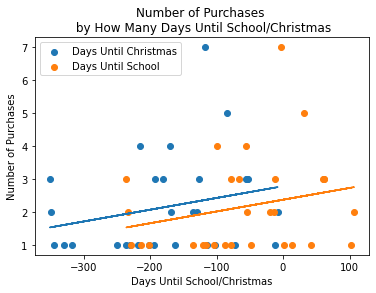

In [16]:
xlist1 = np.array(list(bc_numpurchases.keys()))
ylist1 = np.array(list(bc_numpurchases.values()))

xlist2 = np.array(list(bs_numpurchases.keys()))
ylist2 = np.array(list(bs_numpurchases.values()))

plt.scatter(xlist1, ylist1, label = "Days Until Christmas")
plt.scatter(xlist2, ylist2, label = "Days Until School")
a, b = np.polyfit(xlist1, ylist1, 1)
c, d = np.polyfit(xlist2, ylist2, 1)

plt.plot(xlist1, xlist1*a+b)
plt.plot(xlist2, xlist2*c+d)
plt.xlabel("Days Until School/Christmas")
plt.ylabel("Number of Purchases")
plt.title("Number of Purchases \n by How Many Days Until School/Christmas")
plt.legend()

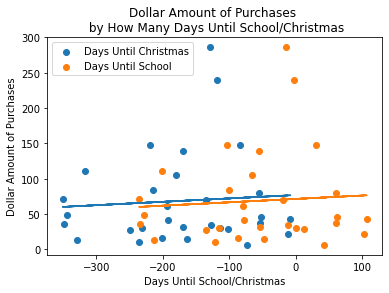

In [21]:
xlist3 = np.array(list(bc_valpurchases.keys()))
ylist3 = np.array(list(bc_valpurchases.values()))

xlist4 = np.array(list(bs_valpurchases.keys()))
ylist4 = np.array(list(bs_valpurchases.values()))

plt.scatter(xlist3, ylist3, label = "Days Until Christmas")
plt.scatter(xlist4, ylist4, label = "Days Until School")
a, b = np.polyfit(xlist3, ylist3, 1)
plt.plot(xlist3, xlist3*a + b)
c, d = np.polyfit(xlist4, ylist4, 1)
plt.plot(xlist4, xlist4*c+d)
plt.xlabel("Days Until School/Christmas")
plt.ylabel("Dollar Amount of Purchases")
plt.title("Dollar Amount of Purchases \n by How Many Days Until School/Christmas")
plt.legend()